# Nigeria Antibiotic Susceptibility DS

quick EDA of the dataset over at
https://data.mendeley.com/datasets/nd4w9wnmzc

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
url = '/content/drive/MyDrive/dataset.xlsx'
df = pd.read_excel(url)
df

,S\N,SEX,WARD\CLINIC,SPECIMEN,CULTURE,Unnamed: 5,ORGANISM,AMOXYCILLIN CLAVULANATE SENSITIVE,AMOXYCILLIN CLAVULANATE INTERMEDIATE,AMOXYCILLIN CLAVULANATE RESISTANT,...,MEROPENEMRESISTANT,NITROFURANTOIN SENSITIVE,NITROFURANTOIN INTERMEDIATE,NITROFURANTOIN RESISTANT,PIP TAZOBACTAM SENSITIVE,PIP TAZOBACTAM INTERMEDIATE,PIP TAZOBACTAM RESISTANT,CEFTRIAXONE SENSITIVE,CEFTRIAXONE INTERMEDIATE,CEFTRIAXONE RESISTANT
0,1,M,Outpatient,Urine,Positive,NaN,Klebsiella sp,S,NaN,,...,NaN,S,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN
1,2,M,Outpatient,Urine,Positive,NaN,Klebsiella sp,S,NaN,NaN,...,NaN,S,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN
2,3,M,Outpatient,Urine,Positive,NaN,Klebsiella sp,S,NaN,NaN,...,NaN,S,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN
3,4,M,Outpatient,Urine,Positive,NaN,Klebsiella sp,S,NaN,NaN,...,NaN,S,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN
4,5,M,Outpatient,Urine,Positive,NaN,Klebsiella sp,S,NaN,NaN,...,NaN,S,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3607,3737,F,In-patient,urine,Negative,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3608,3738,F,In-patient,urine,Negative,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3609,3739,F,In-patient,urine,Negative,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3610,3740,F,In-patient,urine,Negative,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3612 entries, 0 to 3611
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   S\N                                   3612 non-null   object 
 1   SEX                                   3612 non-null   object 
 2   WARD\CLINIC                           3612 non-null   object 
 3   SPECIMEN                              3612 non-null   object 
 4   CULTURE                               3612 non-null   object 
 5   Unnamed: 5                            0 non-null      float64
 6   ORGANISM                              808 non-null    object 
 7   AMOXYCILLIN CLAVULANATE SENSITIVE     120 non-null    object 
 8   AMOXYCILLIN CLAVULANATE INTERMEDIATE  65 non-null     object 
 9   AMOXYCILLIN CLAVULANATE RESISTANT     421 non-null    object 
 10  CEFTAZIDIME SENSITIVE                 281 non-null    object 
 11  CEFTAZIDIME INTER

In [7]:
antibiotics = df.columns[7:]

In [8]:
df.drop(columns=['Unnamed: 5'], inplace=True)

In [9]:
def look_unique(df):
  for column in df:
    print(column, ':', df[column].unique())

look_unique(df)

S\N : [1 2 3 ... 3739 3740 3741]
SEX : ['M' 'F']
WARD\CLINIC : ['Outpatient' 'In-patient']
SPECIMEN : ['Urine' 'urine']
CULTURE : ['Positive' 'positive' 'Negative']
ORGANISM : ['Klebsiella sp' 'E.coli' 'Pseudomonas sp' 'Proteus spp'
 'Staphylococcus aureus' 'Staphylococcus epidermidis'
 'Staphylococcus saprophyticus' 'Enterococcus' 'Candida spp' nan]
AMOXYCILLIN CLAVULANATE SENSITIVE : ['S' nan 'NON']
AMOXYCILLIN CLAVULANATE INTERMEDIATE : [nan 'I']
AMOXYCILLIN CLAVULANATE RESISTANT : ['   ' nan 'R']
CEFTAZIDIME SENSITIVE : ['S' nan]
CEFTAZIDIME INTERMEDIATE : [nan 'I']
CEFTAZIDIME RESISTANT : [nan 'R']
CIPROFLOXACIN SENSITIVE : ['S' nan]
CIPROFLOXACIN INTERMEDIATE : [nan 'I']
CIPROFLOXACINRESISTANT : [nan 'R']
MEROPENEM SENSITIVE : ['S' nan]
MEROPENEM INTERMEDIATE : [nan 'I' 'NON']
MEROPENEMRESISTANT : [nan 'R']
NITROFURANTOIN SENSITIVE : ['S' nan]
NITROFURANTOIN INTERMEDIATE : [nan 'I' 'NON']
NITROFURANTOIN RESISTANT : [nan 'R']
PIP TAZOBACTAM SENSITIVE : ['S' nan]
PIP TAZOBACTAM INT

In [10]:
df[antibiotics] = df[antibiotics].replace(['NON', '   '], np.nan)
df.replace('positive', 'Positive', inplace=True)
look_unique(df)

S\N : [1 2 3 ... 3739 3740 3741]
SEX : ['M' 'F']
WARD\CLINIC : ['Outpatient' 'In-patient']
SPECIMEN : ['Urine' 'urine']
CULTURE : ['Positive' 'Negative']
ORGANISM : ['Klebsiella sp' 'E.coli' 'Pseudomonas sp' 'Proteus spp'
 'Staphylococcus aureus' 'Staphylococcus epidermidis'
 'Staphylococcus saprophyticus' 'Enterococcus' 'Candida spp' nan]
AMOXYCILLIN CLAVULANATE SENSITIVE : ['S' nan]
AMOXYCILLIN CLAVULANATE INTERMEDIATE : [nan 'I']
AMOXYCILLIN CLAVULANATE RESISTANT : [nan 'R']
CEFTAZIDIME SENSITIVE : ['S' nan]
CEFTAZIDIME INTERMEDIATE : [nan 'I']
CEFTAZIDIME RESISTANT : [nan 'R']
CIPROFLOXACIN SENSITIVE : ['S' nan]
CIPROFLOXACIN INTERMEDIATE : [nan 'I']
CIPROFLOXACINRESISTANT : [nan 'R']
MEROPENEM SENSITIVE : ['S' nan]
MEROPENEM INTERMEDIATE : [nan 'I']
MEROPENEMRESISTANT : [nan 'R']
NITROFURANTOIN SENSITIVE : ['S' nan]
NITROFURANTOIN INTERMEDIATE : [nan 'I']
NITROFURANTOIN RESISTANT : [nan 'R']
PIP TAZOBACTAM SENSITIVE : ['S' nan]
PIP TAZOBACTAM INTERMEDIATE : [nan 'I']
PIP TAZOBACTA

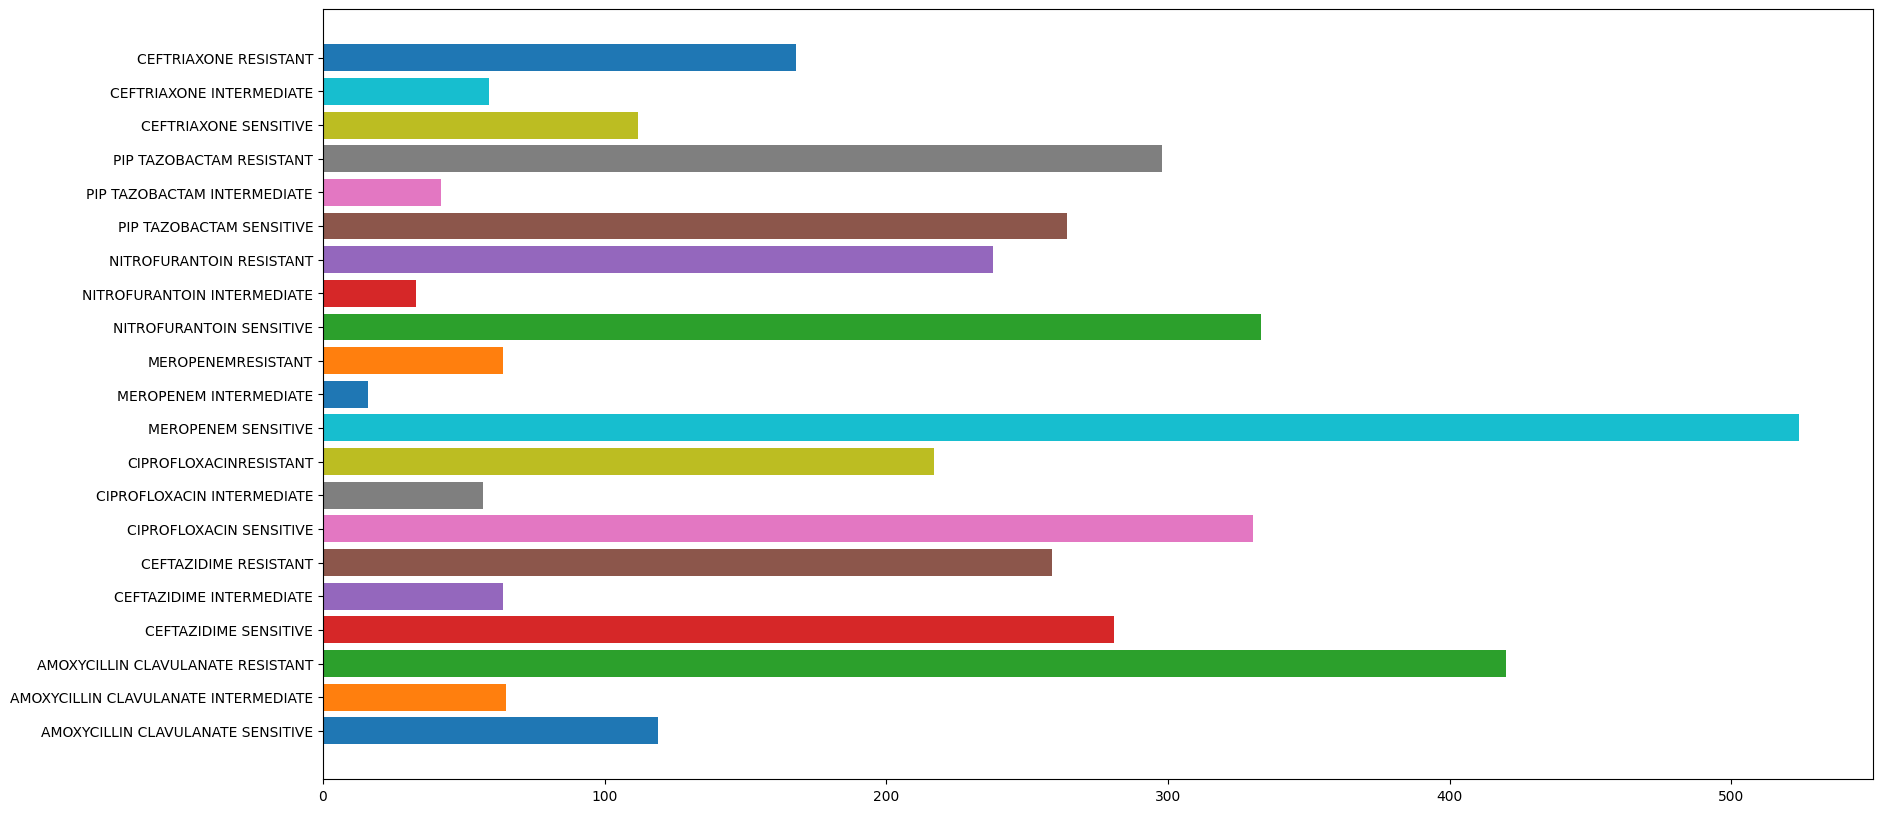

In [11]:
plt.figure(figsize=(20,10))

for antibiotic in antibiotics:
  plt.barh(antibiotic, df[antibiotic].count())

plt.show() # TODO ascending order / color code

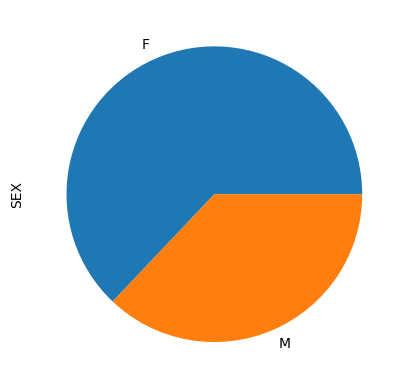

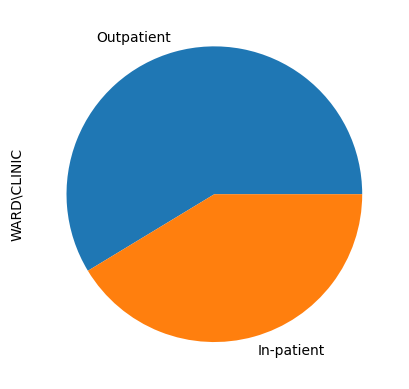

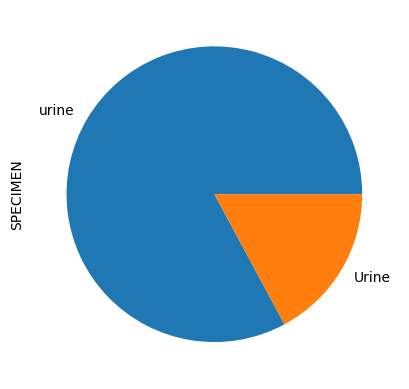

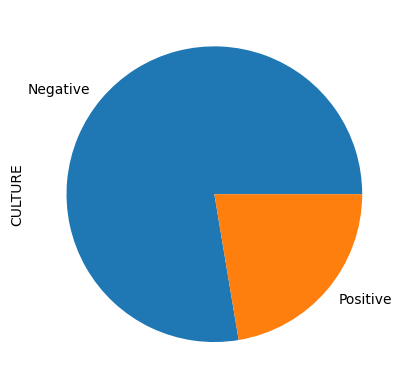

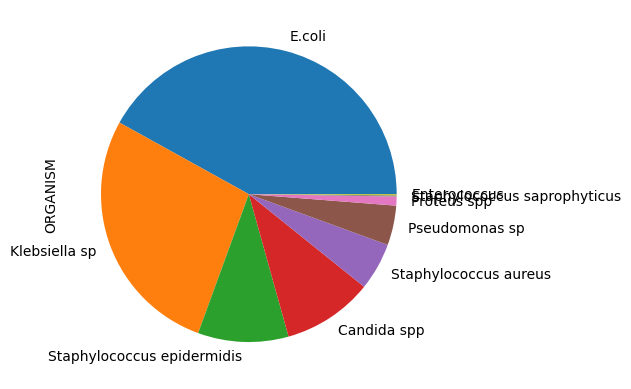

In [12]:
for categorical in df.columns[1:6]:
  df[categorical].value_counts().plot.pie()
  plt.show() # TODO subplots glitching

In [13]:
numerical_df = df[antibiotics].replace(np.nan, 0).replace(['S', 'R', 'I'], 1)
numerical_df.corr() # requires integers

,AMOXYCILLIN CLAVULANATE SENSITIVE,AMOXYCILLIN CLAVULANATE INTERMEDIATE,AMOXYCILLIN CLAVULANATE RESISTANT,CEFTAZIDIME SENSITIVE,CEFTAZIDIME INTERMEDIATE,CEFTAZIDIME RESISTANT,CIPROFLOXACIN SENSITIVE,CIPROFLOXACIN INTERMEDIATE,CIPROFLOXACINRESISTANT,MEROPENEM SENSITIVE,...,MEROPENEMRESISTANT,NITROFURANTOIN SENSITIVE,NITROFURANTOIN INTERMEDIATE,NITROFURANTOIN RESISTANT,PIP TAZOBACTAM SENSITIVE,PIP TAZOBACTAM INTERMEDIATE,PIP TAZOBACTAM RESISTANT,CEFTRIAXONE SENSITIVE,CEFTRIAXONE INTERMEDIATE,CEFTRIAXONE RESISTANT
AMOXYCILLIN CLAVULANATE SENSITIVE,1.000000,-0.024986,-0.066953,0.635489,-0.024790,-0.051299,0.582085,-0.023372,-0.046664,0.448071,...,-0.024790,0.579192,-0.017724,-0.049022,0.657302,-0.020020,-0.055349,0.530714,-0.023785,-0.040766
AMOXYCILLIN CLAVULANATE INTERMEDIATE,-0.024986,1.000000,-0.049104,0.466080,-0.018181,-0.037623,0.426912,-0.017141,-0.034224,0.328624,...,-0.018181,0.424790,-0.012999,-0.035954,0.482077,-0.014683,-0.040594,0.468392,-0.017444,-0.029898
AMOXYCILLIN CLAVULANATE RESISTANT,-0.066953,-0.049104,1.000000,0.207412,0.370258,0.766196,0.322619,0.349080,0.696974,0.684384,...,0.370258,0.329224,0.264718,0.732188,0.163593,0.299018,0.826682,-0.025028,0.355251,0.608877
CEFTAZIDIME SENSITIVE,0.635489,0.466080,0.207412,1.000000,-0.039009,-0.080723,0.894439,0.012985,-0.073430,0.705081,...,-0.039009,0.911411,-0.027890,-0.077140,0.931075,0.161328,-0.064555,0.615898,0.329513,-0.064149
CEFTAZIDIME INTERMEDIATE,-0.024790,-0.018181,0.370258,-0.039009,1.000000,-0.037328,0.212334,0.403961,0.001369,0.326040,...,-0.018038,0.261864,0.450281,-0.027212,0.034848,0.376937,0.226688,-0.024026,0.214470,0.149708
CEFTAZIDIME RESISTANT,-0.051299,-0.037623,0.766196,-0.080723,-0.037328,1.000000,-0.013642,0.188678,0.891592,0.430930,...,0.483242,-0.051477,0.108652,0.951289,-0.078045,-0.010126,0.919032,-0.049717,-0.035815,0.702955
CIPROFLOXACIN SENSITIVE,0.582085,0.426912,0.322619,0.894439,0.212334,-0.013642,1.000000,-0.040152,-0.080167,0.769769,...,-0.042588,0.961816,0.070543,-0.084218,0.878184,0.333097,-0.000789,0.564141,0.406388,0.098791
CIPROFLOXACIN INTERMEDIATE,-0.023372,-0.017141,0.349080,0.012985,0.403961,0.188678,-0.040152,1.000000,-0.032013,0.307391,...,-0.017007,0.059473,0.454804,0.181272,-0.018487,0.006988,0.398043,-0.022651,-0.016317,0.235754
CIPROFLOXACINRESISTANT,-0.046664,-0.034224,0.696974,-0.073430,0.001369,0.891592,-0.080167,-0.032013,1.000000,0.349081,...,0.531237,-0.080568,0.012459,0.937818,-0.070994,-0.027422,0.843098,-0.045226,-0.032579,0.530594
MEROPENEM SENSITIVE,0.448071,0.328624,0.684384,0.705081,0.326040,0.430930,0.769769,0.307391,0.349081,1.000000,...,-0.055325,0.773614,0.233104,0.391250,0.681683,0.263308,0.499370,0.434258,0.312825,0.416706


highest pearson corrolation values for the given antibiotics

In [14]:
numerical_df.corrwith(numerical_df['AMOXYCILLIN CLAVULANATE SENSITIVE']).sort_values(ascending=False)[1:10]

PIP TAZOBACTAM SENSITIVE       0.657302
CEFTAZIDIME SENSITIVE          0.635489
CIPROFLOXACIN SENSITIVE        0.582085
NITROFURANTOIN SENSITIVE       0.579192
CEFTRIAXONE SENSITIVE          0.530714
MEROPENEM SENSITIVE            0.448071
MEROPENEM INTERMEDIATE        -0.012312
NITROFURANTOIN INTERMEDIATE   -0.017724
PIP TAZOBACTAM INTERMEDIATE   -0.020020
dtype: float64

In [15]:
numerical_df.corrwith(numerical_df['CIPROFLOXACIN SENSITIVE']).sort_values(ascending=False)[1:10]

NITROFURANTOIN SENSITIVE                0.961816
CEFTAZIDIME SENSITIVE                   0.894439
PIP TAZOBACTAM SENSITIVE                0.878184
MEROPENEM SENSITIVE                     0.769769
AMOXYCILLIN CLAVULANATE SENSITIVE       0.582085
CEFTRIAXONE SENSITIVE                   0.564141
AMOXYCILLIN CLAVULANATE INTERMEDIATE    0.426912
CEFTRIAXONE INTERMEDIATE                0.406388
PIP TAZOBACTAM INTERMEDIATE             0.333097
dtype: float64

CIPROFLOXACIN SENSITIVE is highly predictable

# task
probability of a patient having resistance to AMOXYCILLIN CLAVULANATE SENSITIVE if they have resistance to CIPROFLOXACIN SENSITIVE
- P(AMOX | CIPR)

In [ ]:
total = df.shape[0]
p_cipr = df['CIPROFLOXACIN SENSITIVE'].count() / total
intercept = df[df['CIPROFLOXACIN SENSITIVE'].notna()
             & df['AMOXYCILLIN CLAVULANATE SENSITIVE'].notna()]
intercept = len(intercept) / total
print(f"P(AMOX | CIPR) = {intercept / p_cipr * 100:.3f}%")

P(AMOX | CIPR) is 36.061%
